### Problem  -- Prepare a prediction model for profit of 50_startups data.

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as snf
import statsmodels.formula.api as smf
import statsmodels.api as sa
from scipy import stats

In [40]:
startup_data = pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
startup_data = startup_data.rename(columns={'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'MS'})
startup_data

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
startup_data.shape

(50, 5)

In [11]:
startup_data.isna().sum()

RD        0
Admin     0
MS        0
State     0
Profit    0
dtype: int64

In [12]:
startup_data.dtypes

RD        float64
Admin     float64
MS        float64
State      object
Profit    float64
dtype: object

In [13]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   Admin   50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [14]:
startup_data.count()

RD        50
Admin     50
MS        50
State     50
Profit    50
dtype: int64

In [15]:
startup_data.describe(include='all')

,RD,Admin,MS,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [16]:
round(startup_data.corr(),2)

,RD,Admin,MS,Profit
RD,1.00,0.24,0.72,0.97
Admin,0.24,1.00,-0.03,0.20
MS,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


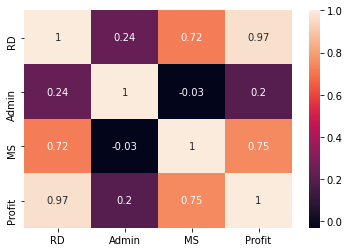

In [19]:
sns.heatmap(data=round(startup_data.corr(),2),annot=True)
plt.show()

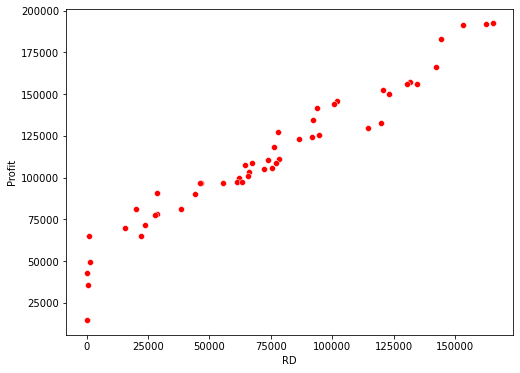

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RD',y='Profit',data=startup_data,color='red')
plt.show()

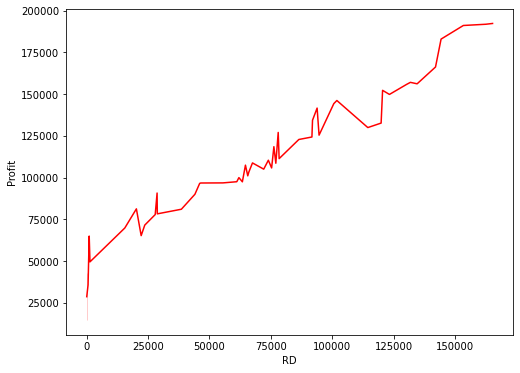

In [21]:
plt.figure(figsize=(8,6))
sns.lineplot(x='RD',y='Profit',data=startup_data,color='red')
plt.show()

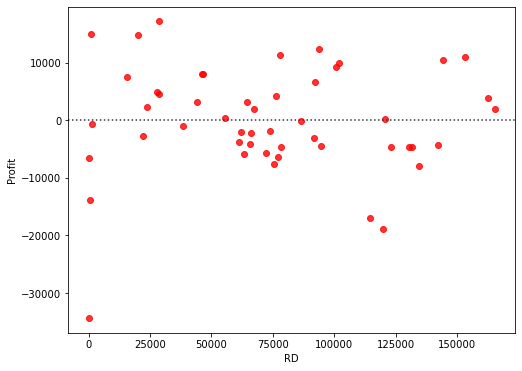

In [22]:
plt.figure(figsize=(8,6))
sns.residplot(x='RD',y='Profit',data=startup_data,color='red')
plt.show()

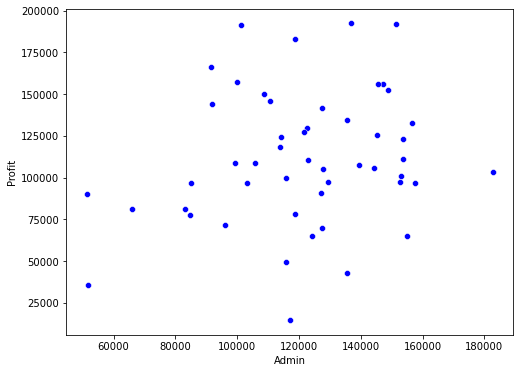

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Admin',y='Profit',data=startup_data,color='Blue')
plt.show()

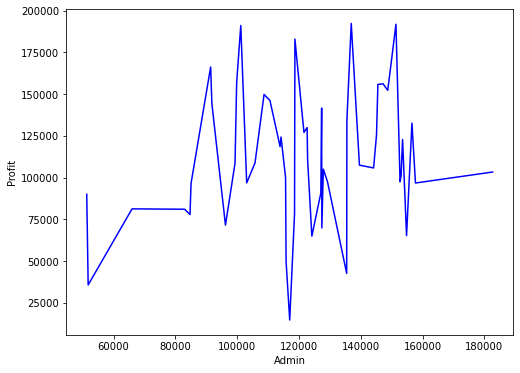

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Admin',y='Profit',data=startup_data,color='Blue')
plt.show()


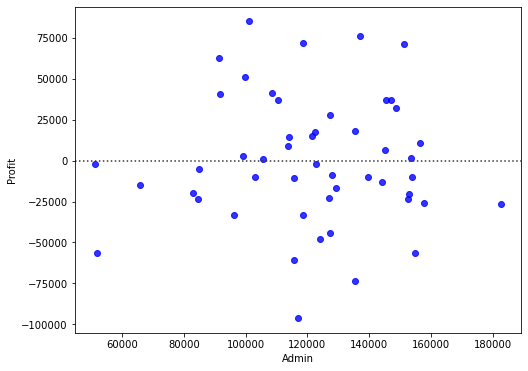

In [26]:
plt.figure(figsize=(8,6))
sns.residplot(x='Admin',y='Profit',data=startup_data,color='Blue')
plt.show()

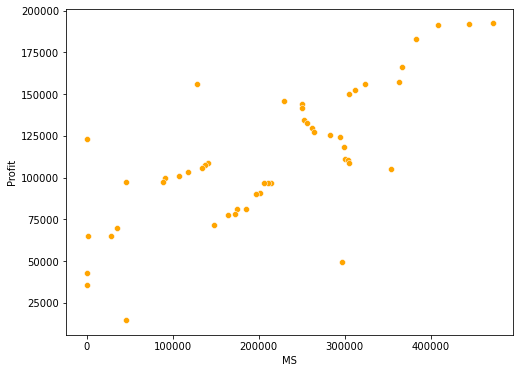

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MS',y='Profit',data=startup_data,color='orange')
plt.show()

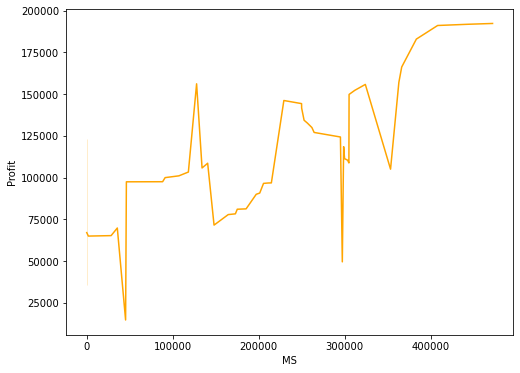

In [29]:
plt.figure(figsize=(8,6))
sns.lineplot(x='MS',y='Profit',data=startup_data,color='orange')
plt.show()

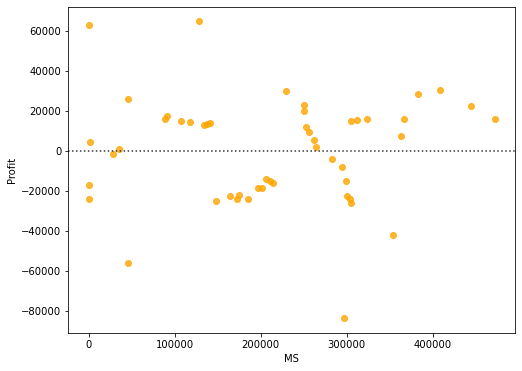

In [30]:
plt.figure(figsize=(8,6))
sns.residplot(x='MS',y='Profit',data=startup_data,color='orange')
plt.show()

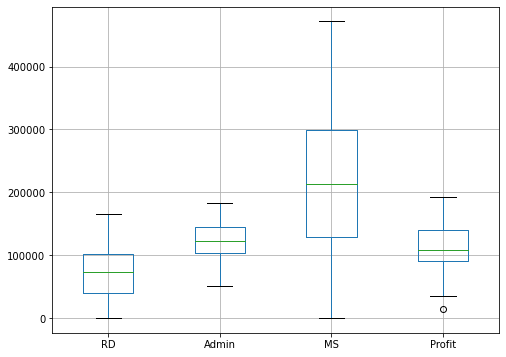

In [31]:
plt.figure(figsize=(8,6))
startup_data.boxplot()
plt.show()

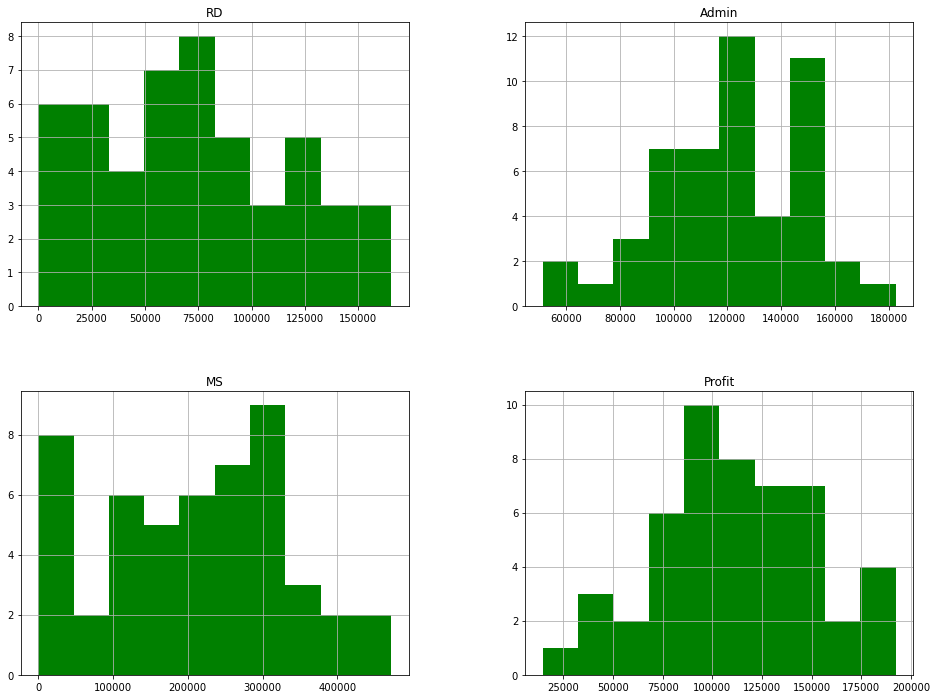

In [32]:
startup_data.hist(figsize = (16,12),color='green')
plt.show()

<Figure size 1296x648 with 0 Axes>

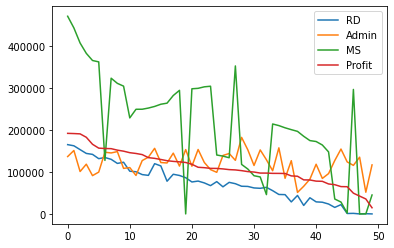

In [33]:
plt.figure(figsize=(18,9))
startup_data.plot()
plt.show()

In [42]:
del startup_data['State']

In [43]:
startup_data

,RD,Admin,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [47]:
stat_model = smf.ols('Profit~RD+Admin+MS',data=startup_data).fit()

In [48]:
stat_model.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [49]:
stat_model.pvalues

Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
MS           1.047168e-01
dtype: float64

In [50]:
stat_model.tvalues

Intercept     7.626218
RD           17.846374
Admin        -0.525507
MS            1.655077
dtype: float64

In [52]:
stat_model.summary()
#We can see the summary of the stat model below

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        20:06:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

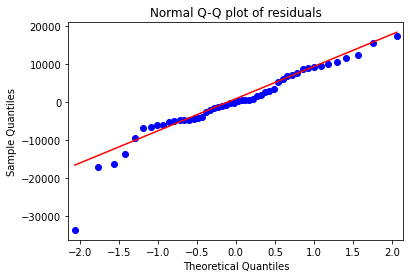

In [53]:
import statsmodels.api as sm
qqplot=sm.qqplot(stat_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [56]:
# we get the R2 score, R2 adjusted score, AIC and BIC below

stat_model2=smf.ols('Profit~RD',data=startup_data).fit()
print('R2 Score           : ',round(stat_mode2.rsquared,4))      # Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(stat_mode2.rsquared_adj,4))  # Contribution of overall input features towards the predication
print('AIC                : ',round(stat_mode2.aic,4))
print('BIC                : ',round(stat_mode2.bic,4))

R2 Score           :  0.9465
R2 adjusted Score  :  0.9454
AIC                :  1058.873
BIC                :  1062.6971


In [58]:
#summary of the stat_model2
stat_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           3.50e-32
Time:                        20:09:44   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

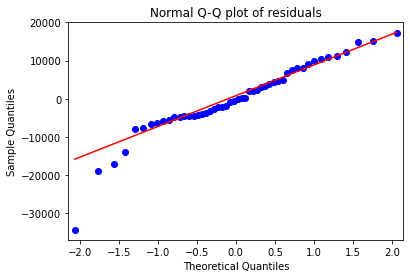

In [60]:
import statsmodels.api as sm
qqplot=sm.qqplot(stat_model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [62]:
stat_mode3=smf.ols('Profit~RD+Admin',data=startup_data).fit()
print('R2 Score           : ',round(stat_mode3.rsquared,4))      
print('R2 adjusted Score  : ',round(stat_mode3.rsquared_adj,4))  
print('AIC                : ',round(stat_mode3.aic,4))
print('BIC                : ',round(stat_mode3.bic,4))

R2 Score           :  0.9478
R2 adjusted Score  :  0.9456
AIC                :  1059.6637
BIC                :  1065.3998


In [63]:
stat_mode3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           7.29e-31
Time:                        20:11:35   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RD             0.8621      0.030     28.589      0.000       0.801       0.923
Admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

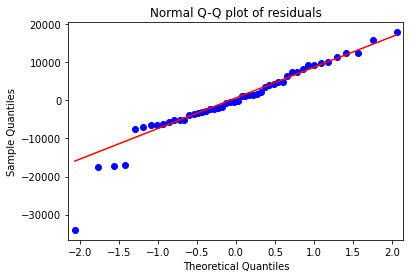

In [64]:
import statsmodels.api as sm
qqplot=sm.qqplot(stat_mode3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [66]:
stat_mode4=smf.ols('Profit~RD+Admin+MS',data=startup_data).fit()
print('R2 Score           : ',round(stat_mode4.rsquared,4))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(stat_mode4.rsquared_adj,4))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(stat_mode4.aic,4))
print('BIC                : ',round(stat_mode4.bic,4))

R2 Score           :  0.9507
R2 adjusted Score  :  0.9475
AIC                :  1058.7715
BIC                :  1066.4196


In [67]:
stat_mode4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        20:12:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

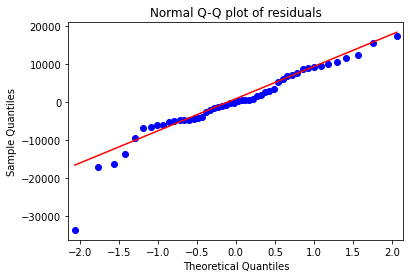

In [68]:
import statsmodels.api as sm
qqplot=sm.qqplot(stat_mode4.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

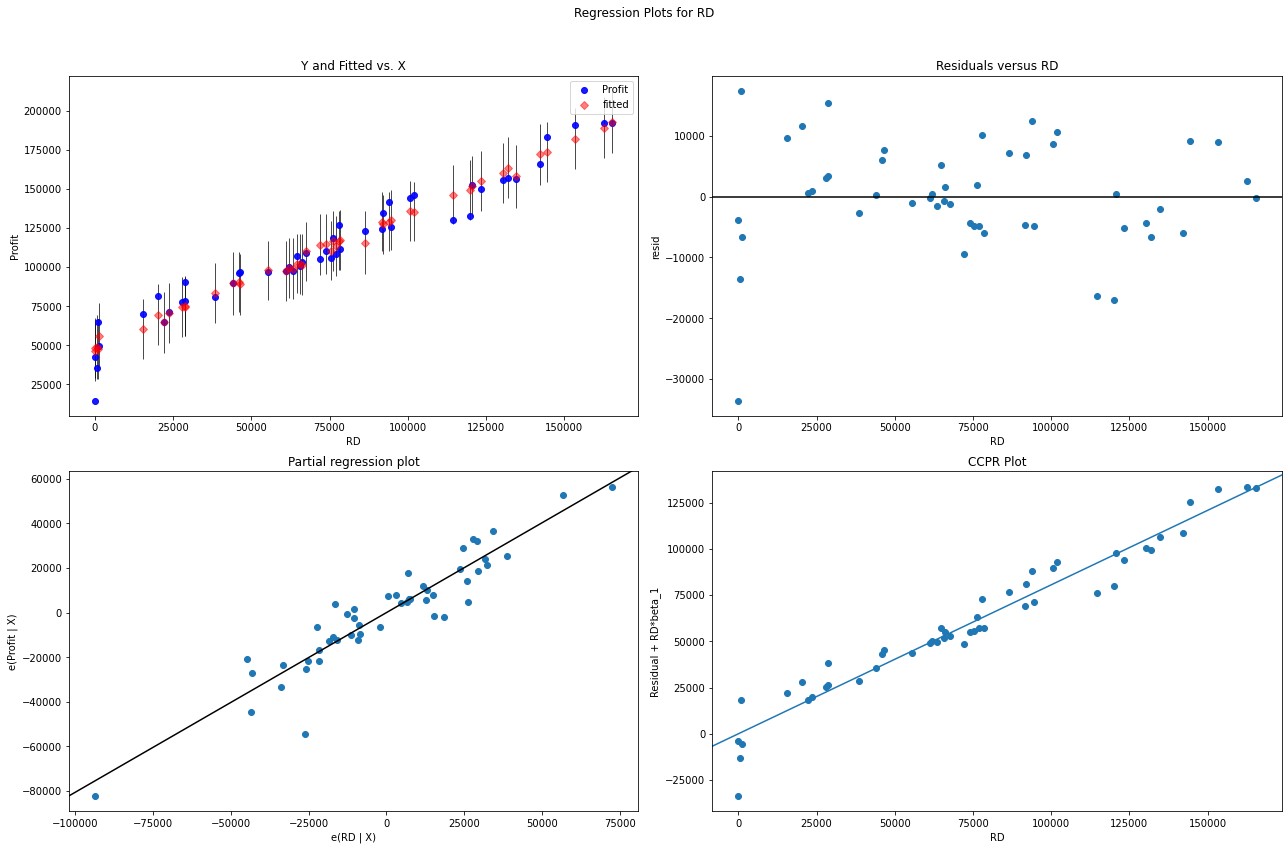

In [69]:
fig = plt.figure(figsize=(18,12))
fig = sm.graphics.plot_regress_exog(stat_model,'RD',fig=fig)
plt.show()

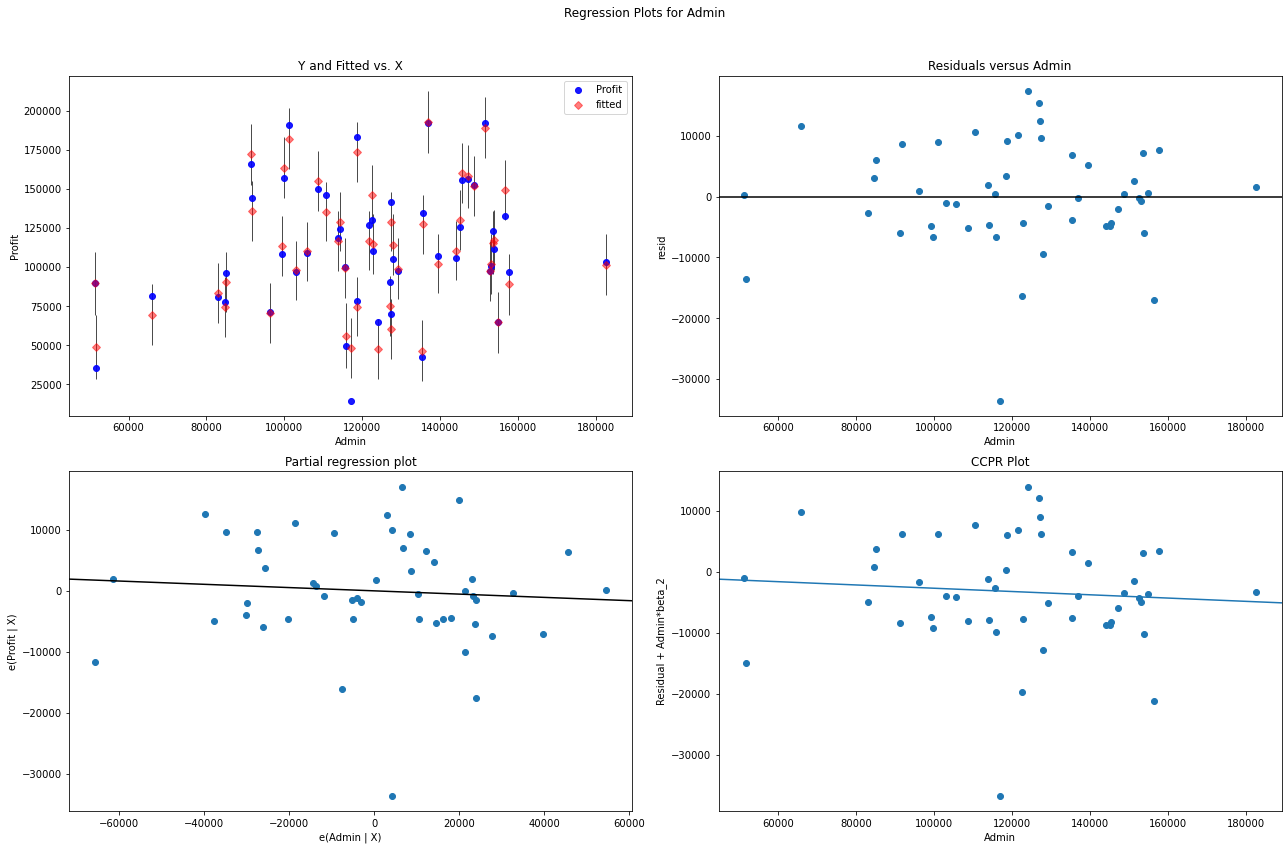

In [70]:
fig = plt.figure(figsize=(18,12))
fig = sm.graphics.plot_regress_exog(stat_model,'Admin',fig=fig)
plt.show()

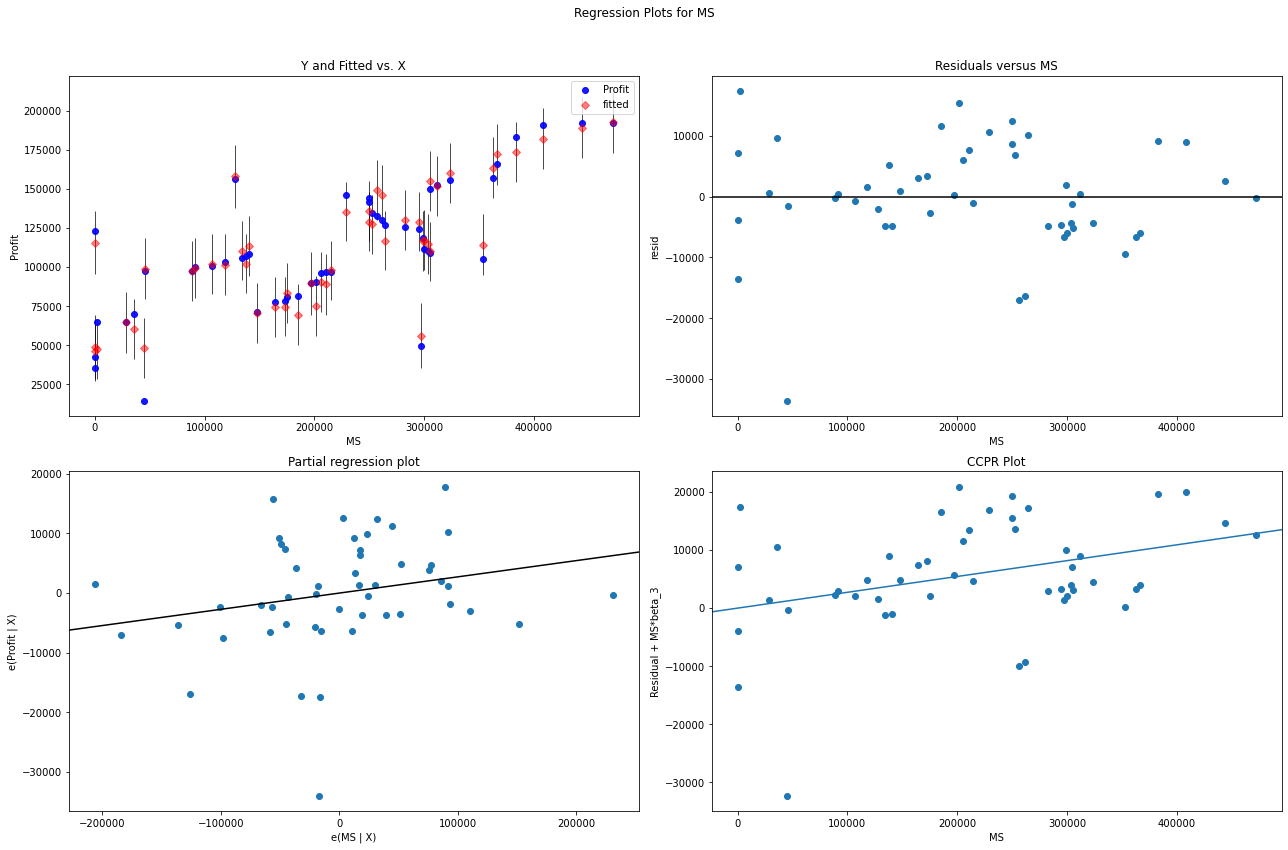

In [71]:
fig = plt.figure(figsize=(18,12))
fig = sm.graphics.plot_regress_exog(stat_model,'MS',fig=fig)
plt.show()

In [72]:
model_influence = stat_model.get_influence()
(c,_)= model_influence.cooks_distance

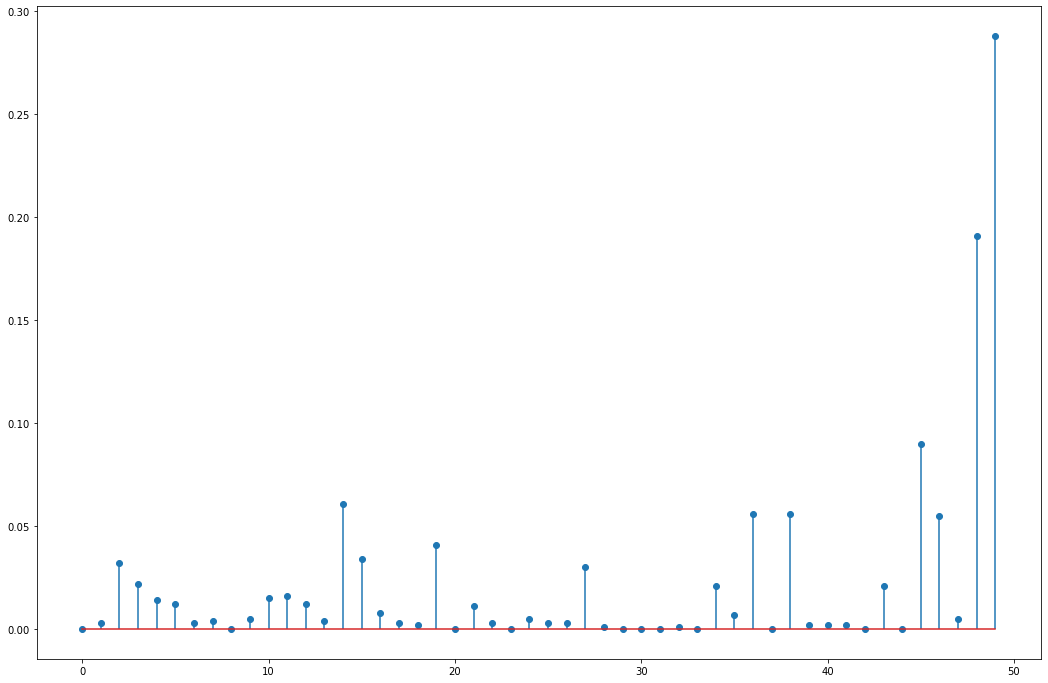

In [76]:
plt.figure(figsize=(18,12))
plt.stem(np.arange(len(startup_data)),np.round(c,3))
plt.show()

In [77]:
np.argmax(c),np.max(c)

(49, 0.2880822927543267)

In [78]:
# importing influence plot
from statsmodels.graphics.regressionplots import influence_plot

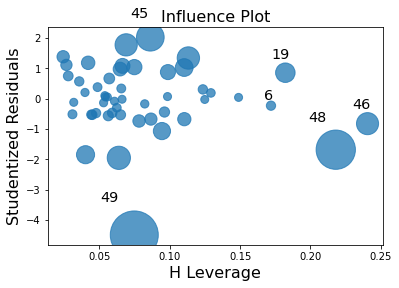

In [79]:
influence_plot(stat_model)
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x = startup_data.drop(labels=['Profit'],axis=1)
y = startup_data[['Profit']]


In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=12)

In [85]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((40, 3), (40, 1), (10, 3), (10, 1))

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [87]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [88]:
x_test

,RD,Admin,MS
28,66051.52,182645.56,118148.20
46,1315.46,115816.21,297114.46
7,130298.13,145530.06,323876.68
41,27892.92,84710.77,164470.71
36,28663.76,127056.21,201126.82
29,65605.48,153032.06,107138.38
21,78389.47,153773.43,299737.29
48,542.05,51743.15,0.00
19,86419.70,153514.11,0.00
8,120542.52,148718.95,311613.29


In [89]:
y_pred = linear_model.predict(x_test)
y_pred

array([[ 99227.78590106],
       [ 57330.42689013],
       [158942.01003194],
       [ 76443.25357295],
       [ 75488.25175017],
       [100412.02470383],
       [116367.18632661],
       [ 51779.85090037],
       [113711.10968112],
       [150603.23224831]])

In [90]:
print('R2_Score : ',round(r2_score(y_test,y_pred),4))

R2_Score :  0.9497


In [91]:
from sklearn.linear_model import ARDRegression

In [92]:
ARD_model = ARDRegression()

In [93]:
ARD_model.fit(x_train,y_train)

ARDRegression()

In [94]:
y_pred2 = ARD_model.predict(x_test)

In [95]:
print('R2_Score : ',round(r2_score(y_test,y_pred2),4))

R2_Score :  0.9586


#### 
* A prediction model for profit of 50_startups data is prepared. 
* The transformations for getting better predictions of profit is done.
* A table containing R^2 value for each prepared model is prepared.